<h1 style="
  font-family: 'Glacial Indifference', sans-serif;
  font-size: 30px;
  text-align: center;
  background-color: #0F5444;
  color: white;
  border-radius: 50px 50px 0 0;
  line-height: 1.5;
  text-transform: uppercase;
  margin: 0;
  padding: 15px 20px;
">
  Exploratory Data Analysis Notebook
</h1>

The purpose of this exploratory data analysis is to assess data quality, understand the distribution of lifestyle characteristics, and describe differences between individuals with and without diagnosed diabetes.

# 1. Setup & Imports

In [36]:
import pandas as pd
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / "data" / "raw"

# 2. Data Loading

In [38]:
for dirname, _, filenames in os.walk(str(DATA_DIR)):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\Github\diabetes_project\data\raw\.gitkeep
E:\Github\diabetes_project\data\raw\diabetes_dataset.csv


In [39]:
raw_df = pd.read_csv(DATA_DIR / "diabetes_dataset.csv")

# 3. Data Preprocessing

## 3.1 Data overview

In [40]:
raw_df.shape

(100000, 31)

In [41]:
raw_df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [42]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [43]:
raw_df.duplicated().sum()

np.int64(0)

Based on the publisher’s documentation and initial inspection, the dataset contains no missing values and all variables fall within clinically plausible ranges. Therefore, extensive data cleaning procedures (e.g. imputation, error correction) are not required.

## 3.2 Analysis Dataset Construction

Prior to exploratory data analysis, an analysis-ready dataset was constructed based on the predefined research objective: to examine the association between lifestyle characteristics and diagnosed diabetes. The dataset includes the diabetes diagnosis outcome, a set of modifiable lifestyle exposures, and demographic variables retained solely for confounding adjustment. Clinical biomarkers and intermediate metabolic indicators were intentionally excluded to avoid conditioning on variables that lie on the causal pathway between lifestyle behaviors and diabetes.


In [44]:
# Outcome
outcome_var = ["diagnosed_diabetes"]

# Lifestyle exposures
lifestyle_vars = [
    "smoking_status",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
]

# Demographic covariates
demographic_vars = [
    "age",
    "gender",
    "ethnicity",
    "education_level",
    "income_level",
    "employment_status",
]

# All variables list
selected_vars = outcome_var + lifestyle_vars + demographic_vars

# Subset of selected variables
processed_df = raw_df[selected_vars].copy()


In [45]:
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

processed_df.to_csv(
    PROCESSED_DIR / "diabetes_lifestyle_analysis.csv",
    index=False
)

## Data Description
**Outcome Variable**
- `diagnosed_diabetes` *(Integer)*: diabetes diagnosis status (0 = No, 1 = Yes)

**Lifestyle Characteristics (Primary Exposures)**
- `smoking_status` *(Categorical)*: smoking behavior (*Never, Former, Current*)
- `alcohol_consumption_per_week` *(Numeric)*: number of alcoholic drinks consumed per week (range: 0–30)
- `physical_activity_minutes_per_week` *(Numeric)*: total minutes of physical activity per week (range: 0–600)
- `diet_score` *(Numeric)*: composite diet quality score, higher values indicate healthier dietary patterns (range: 0–10)
- `sleep_hours_per_day` *(Numeric)*: average number of sleep hours per day (range: 3–12)
- `screen_time_hours_per_day` *(Numeric)*: average daily screen time in hours (range: 0–12)

**Demographic Covariates (Adjustment Variables)**
- `age` *(Integer)*: age of the individual in years (range: 18–90)
- `gender` *(Categorical)*: gender (*Male, Female, Other*)
- `ethnicity` *(Categorical)*: ethnic background (*White, Hispanic, Black, Asian, Other*)
- `education_level` *(Categorical)*: highest completed education level (*No formal, Highschool, Graduate, Postgraduate*)
- `income_level` *(Categorical)*: income category (*Low, Medium, High*)
- `employment_status` *(Categorical)*: employment status (*Employed, Unemployed, Retired, Student*)


# 4. EDA

## 4.1. Outcome Prevalencem

In [46]:
outcome_counts = processed_df["diagnosed_diabetes"].value_counts(normalize=True)
outcome_counts

diagnosed_diabetes
1    0.59998
0    0.40002
Name: proportion, dtype: float64

Diagnosed diabetes was observed in approximately 60% of the study population, indicating that the outcome is relatively common in this dataset rather than rare.

## 4.2. Numerical Variable

### 4.2.1 Distribution

In [47]:
num_vars = [
    "age",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
]

processed_df[num_vars].describe()


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000


Continuous variables exhibited plausible distributions and ranges consistent with real-world population data. The study population had a mean age of approximately 50 years, with balanced representation across adult age groups. Lifestyle variables showed substantial variability, including physical activity levels ranging from sedentary to highly active patterns, and diet, sleep, and screen time measures centered around expected population averages. No implausible values or extreme anomalies were observed, supporting the suitability of these variables for subsequent regression modeling.


### 4.3.2 Distribution by Outcome

In [48]:
processed_df.groupby("diagnosed_diabetes")[num_vars].mean()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day
diagnosed_diabetes,,,,,,
0,47.488601,2.00235,129.329184,6.091405,6.998353,5.941670
1,51.875096,2.00455,111.966032,5.930369,6.997462,6.033003


- Participants with diagnosed diabetes were, on average, older than those without diabetes, consistent with the established association between increasing age and diabetes risk.
- Individuals with diabetes reported lower levels of physical activity and slightly poorer diet scores compared with non-diabetic participants.
- Mean alcohol consumption was similar between groups, suggesting limited differentiation by drinking behavior in this dataset.
- Average sleep duration was nearly identical across diabetes status.
- Participants with diabetes reported marginally higher daily screen time.
- None of the lifestyle variables demonstrated extreme separation between outcome groups, supporting the suitability of multivariable logistic regression rather than univariable or threshold-based approaches.

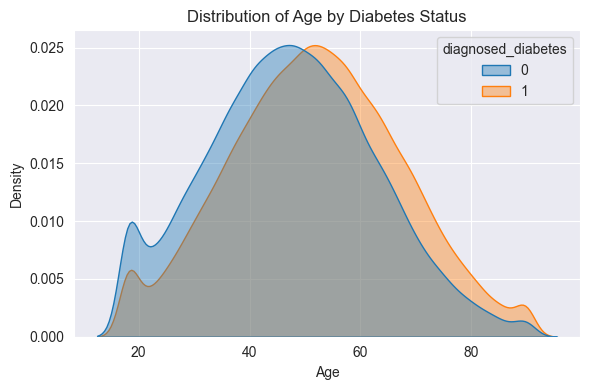

In [ ]:
for var in num_vars:
    plt.figure(figsize=(6, 4))

    sns.kdeplot(
        data=processed_df,
        x=var,
        hue="diagnosed_diabetes",
        fill=True,
        common_norm=False,
        alpha=0.4
    )

    plt.title(f"Distribution of {var.replace('_', ' ').title()} by Diabetes Status")
    plt.xlabel(var.replace('_', ' ').title())
    plt.ylabel("Density")
    # plt.legend(title="Diagnosed Diabetes")
    plt.tight_layout()
    plt.show()

## 4.3. Categorical Variables

### 4.3.1. Distribution

In [33]:
cat_vars = [
    "smoking_status",
    "gender",
    "ethnicity",
    "education_level",
    "income_level",
    "employment_status",
]

for col in cat_vars:
    print(f"\n{col}")
    print(processed_df[col].value_counts())


smoking_status
smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64

gender
gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

ethnicity
ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

education_level
education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No formal        5100
Name: count, dtype: int64

income_level
income_level
Middle          35152
Lower-Middle    25150
Upper-Middle    19866
Low             14830
High             5002
Name: count, dtype: int64

employment_status
employment_status
Employed      60175
Retired       21761
Unemployed    11918
Student        6146
Name: count, dtype: int64


### 4.3.2. Categorical Variables by Outcome

In [34]:
for var in cat_vars:
    print(f"\nDistribution of diagnosed_diabetes by {var}")
    display(
        pd.crosstab(
            processed_df[var],
            processed_df["diagnosed_diabetes"],
            normalize="index"
        )
    )



Distribution of diagnosed_diabetes by smoking_status


diagnosed_diabetes,0,1
smoking_status,,
Current,0.399931,0.600069
Former,0.398881,0.601119
Never,0.400431,0.599569



Distribution of diagnosed_diabetes by gender


diagnosed_diabetes,0,1
gender,,
Female,0.401545,0.598455
Male,0.399343,0.600657
Other,0.378043,0.621957



Distribution of diagnosed_diabetes by ethnicity


diagnosed_diabetes,0,1
ethnicity,,
Asian,0.399241,0.600759
Black,0.398588,0.601412
Hispanic,0.406059,0.593941
Other,0.392355,0.607645
White,0.398960,0.601040



Distribution of diagnosed_diabetes by education_level


diagnosed_diabetes,0,1
education_level,,
Graduate,0.398807,0.601193
Highschool,0.399323,0.600677
No formal,0.395490,0.604510
Postgraduate,0.406492,0.593508



Distribution of diagnosed_diabetes by income_level


diagnosed_diabetes,0,1
income_level,,
High,0.392843,0.607157
Low,0.399461,0.600539
Lower-Middle,0.396143,0.603857
Middle,0.403306,0.596694
Upper-Middle,0.401339,0.598661



Distribution of diagnosed_diabetes by employment_status


diagnosed_diabetes,0,1
employment_status,,
Employed,0.398488,0.601512
Retired,0.404715,0.595285
Student,0.402701,0.597299
Unemployed,0.397802,0.602198


- Across categorical variables, diabetes status is fairly stable, with roughly 60% diagnosed and 40% not, regardless of subgroup.
- Smoking: Minimal differences; current, former, and never smokers show similar diabetes proportions.
- Gender: Largely consistent; the “Other” category shows slightly higher diabetes, likely due to small sample size.
- Ethnicity: Modest variation; Hispanic individuals have slightly lower diabetes rates.
- Education: Minor differences; postgraduate degrees show marginally lower diabetes prevalence.
- Income: Small differences; higher-income groups show slightly higher diabetes, though effect is limited.
- Employment: Minimal separation; retired individuals have slightly lower diabetes rates.

Overall, with diabetes rates around 60:40 across all categorical groups, demographic and socioeconomic factors exhibit weak univariate separation by diabetes status.

## 4.4. Correlation Check

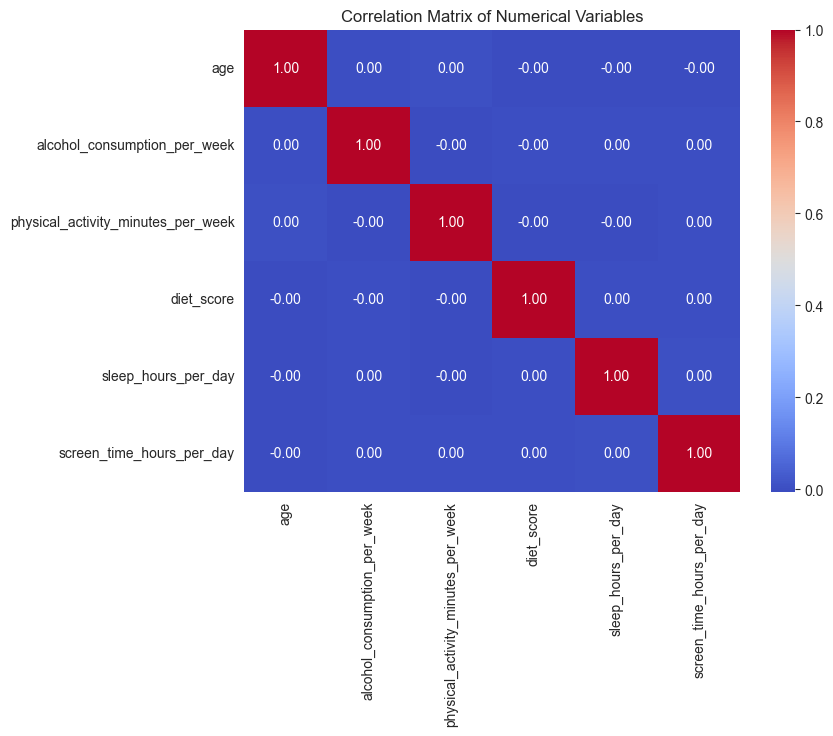

In [35]:
corr_matrix = processed_df[num_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


- The absence of strong correlations suggests a low risk of multicollinearity in subsequent logistic regression modeling.
- This pattern is consistent with the dataset’s synthetic construction, where features were generated to reflect realistic distributions while avoiding excessive redundancy.

# 5. Key EDA Takeaways
- Diabete-Diagnosed individuals are older on average
- Lifestyle factors (smoking, physical activity) show meaningful group differences
- These patterns motivate a multivariable logistic regression model
